<a href="https://colab.research.google.com/github/vlasovss/ProjectEuler/blob/main/pyProjectEuler40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Eulera на Python
## Задачи с 21 по 40

---
# Задача 21. 

Пусть d(n) определяется как сумма делителей n (числа меньше n, делящие n нацело).
Если d(a) = b и d(b) = a, где a ≠ b, то a и b называются дружественной парой, а каждое из чисел a и b - дружественным числом.

Например, делителями числа 220 являются 1, 2, 4, 5, 10, 11, 20, 22, 44, 55 и 110, поэтому d(220) = 284. Делители 284 - 1, 2, 4, 71, 142, поэтому d(284) = 220.

Подсчитайте сумму всех дружественных чисел меньше 10000.

[Оригинал](https://projecteuler.net/problem=21) [На русском](https://euler.jakumo.org/problems/view/21.html)

Completed on Mon, 12 Oct 2020, 23:56

In [ ]:
def get_delimiters(num):
    return [d for d in range(1, num) if num % d == 0]

friendly_numbers = []
for num in range(1, 10000):
    if num not in friendly_numbers:
        b = sum(get_delimiters(num))
        a = sum(get_delimiters(b))
        if a == num and a != b:
            friendly_numbers.append(a)
            friendly_numbers.append(b)

print(friendly_numbers)
print(sum(friendly_numbers))

---
# Задача 22. 

Используйте [names.txt](https://projecteuler.net/project/resources/p022_names.txt) (щелкнуть правой кнопкой мыши и выбрать 'Save Link/Target As...'), текстовый файл размером 46 КБ, содержащий более пяти тысяч имен.

> См. файл sample_data/p022_names.txt

Начните с сортировки в алфавитном порядке. Затем подсчитайте алфавитные значения каждого имени и умножьте это значение на порядковый номер имени в отсортированном списке для получения количества очков имени.

Например, если список отсортирован по алфавиту, имя COLIN (алфавитное значение которого 3 + 15 + 12 + 9 + 14 = 53) является 938-ым в списке. Поэтому, имя COLIN получает 938 × 53 = 49714 очков.

Какова сумма очков имен в файле?

[Оригинал](https://projecteuler.net/problem=22) [На русском](https://euler.jakumo.org/problems/view/22.html)

Completed on Wed, 14 Oct 2020, 08:42

In [ ]:
import string

ENG_ALPHABET = {
    'A': 1,	
	'B': 2,
	'C': 3,	
	'D': 4,	
	'E': 5,
	'F': 6,
	'G': 7,	
	'H': 8,	
	'I': 9,
	'J': 10,	
	'K': 11,
	'L': 12,
	'M': 13,
	'N': 14,
	'O': 15,
	'P': 16,
	'Q': 17,
	'R': 18,
	'S': 19,
	'T': 20,	
	'U': 21,
	'V': 22,
	'W': 23,
	'X': 24,
	'Y': 25,
	'Z': 26
}

tt = str.maketrans(dict.fromkeys(string.punctuation))
with open("/content/drive/My Drive/ProjectEuler/sample_data/p022_names.txt") as f:
    names = [name.translate(tt) for name in f.read().split(',')]

names.sort()
print(sum(sum(ENG_ALPHABET[letter] for letter in name) * (i+1) for i, name in enumerate(names)))



---
# Задача 23. 

[Оригинал](https://projecteuler.net/problem=23) [На русском](https://euler.jakumo.org/problems/view/23.html)



---
# Задача 24.

[Оригинал](https://projecteuler.net/problem=24) [На русском](https://euler.jakumo.org/problems/view/24.html)



---
# Задача 25. 

[Оригинал](https://projecteuler.net/problem=25) [На русском](https://euler.jakumo.org/problems/view/25.html)



# Задача 26. 

[Оригинал](https://projecteuler.net/problem=26) [На русском](https://euler.jakumo.org/problems/view/26.html)



---
# Задача 27. 

[Оригинал](https://projecteuler.net/problem=27) [На русском](https://euler.jakumo.org/problems/view/27.html)



# Задача 28. 

[Оригинал](https://projecteuler.net/problem=28) [На русском](https://euler.jakumo.org/problems/view/28.html)



---
# Задача 29. 

[Оригинал](https://projecteuler.net/problem=29) [На русском](https://euler.jakumo.org/problems/view/29.html)



---
# Задача 30. Сложение простых чисел


[Оригинал](https://projecteuler.net/problem=30) [На русском](https://euler.jakumo.org/problems/view/30.html)



---
# Задача 31. Наибольшее произведение в таблице


[Оригинал](https://projecteuler.net/problem=31) [На русском](https://euler.jakumo.org/problems/view/31.html)



# Задача 12. Треугольное число с большим количеством делителей
Последовательность треугольных чисел образуется путем сложения натуральных чисел. К примеру, 7-ое треугольное число равно 1 + 2 + 3 + 4 + 5 + 6 + 7 = 28. Первые десять треугольных чисел:

>1, 3, 6, 10, 15, 21, 28, 36, 45, 55, ...

Перечислим делители первых семи треугольных чисел:

 1: 1

 3: 1, 3

 6: 1, 2, 3, 6

10: 1, 2, 5, 10

15: 1, 3, 5, 15

21: 1, 3, 7, 21

28: 1, 2, 4, 7, 14, 28

Как мы видим, 28 - первое треугольное число, у которого более пяти делителей.

Каково первое треугольное число, у которого более пятисот делителей?

[Оригинал](https://projecteuler.net/problem=12) [На русском](https://euler.jakumo.org/problems/view/12.html)

Completed on Mon, 5 Oct 2020, 23:21

# Задача 13. Большая сумма
Найдите первые десять цифр суммы следующих ста 50-значных чисел.

>См. файл sample_data/50digit_nums.txt

[Оригинал](https://projecteuler.net/problem=13) [На русском](https://euler.jakumo.org/problems/view/13.html)

Completed on Tue, 6 Oct 2020, 08:40

# Задача 14. Самая длинная последовательность Коллатца
Следующая повторяющаяся последовательность определена для множества натуральных чисел:

>n → n/2 (n - четное)

>n → 3n + 1 (n - нечетное)

Используя описанное выше правило и начиная с 13, сгенерируется следующая последовательность:

>13 → 40 → 20 → 10 → 5 → 16 → 8 → 4 → 2 → 1

Получившаяся последовательность (начиная с 13 и заканчивая 1) содержит 10 элементов. Хотя это до сих пор и не доказано (проблема Коллатца (Collatz)), предполагается, что все сгенерированные таким образом последовательности оканчиваются на 1.

Какой начальный элемент меньше миллиона генерирует самую длинную последовательность?

**Примечание:** Следующие за первым элементы последовательности могут быть больше миллиона.

[Оригинал](https://projecteuler.net/problem=14) [На русском](https://euler.jakumo.org/problems/view/14.html)

Completed on Tue, 6 Oct 2020, 13:26

# Задача 15. Пути через таблицу
Начиная в левом верхнем углу сетки 2×2 и имея возможность двигаться только вниз или вправо, существует ровно 6 маршрутов до правого нижнего угла сетки.

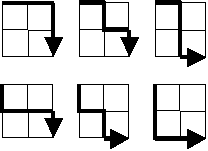

Сколько существует таких маршрутов в сетке 20×20?

[Материалы](https://informatics.mccme.ru/mod/book/view.php?id=266&chapterid=57) для решения.

[Оригинал](https://projecteuler.net/problem=15) [На русском](https://euler.jakumo.org/problems/view/15.html)

Completed on Thu, 8 Oct 2020, 19:38

# Задача 16. Сумма цифр степени
2^15 = 32768, сумма цифр этого числа равна 3 + 2 + 7 + 6 + 8 = 26.

Какова сумма цифр числа 2^1000?

[Оригинал](https://projecteuler.net/problem=16) [На русском](https://euler.jakumo.org/problems/view/16.html)

Completed on Thu, 8 Oct 2020, 20:34

# Задача 17. Счет букв в числительных
Если записать числа от 1 до 5 английскими словами (one, two, three, four, five), то используется всего 3 + 3 + 5 + 4 + 4 = 19 букв.

Сколько букв понадобится для записи всех чисел от 1 до 1000 (one thousand) включительно?

>См. файл sample_data/1000_nums_eng.csv

**Примечание:** Не считайте пробелы и дефисы. Например, число 342 (three hundred and forty-two) состоит из 23 букв, число 115 (one hundred and fifteen) - из 20 букв. Использование "and" при записи чисел соответствует правилам британского английского.

[Оригинал](https://projecteuler.net/problem=17) [На русском](https://euler.jakumo.org/problems/view/17.html)

Completed on Thu, 8 Oct 2020, 22:10

# Задача 18. Максимальная сумма пути I
Начиная в вершине треугольника (см. пример ниже) и перемещаясь вниз на смежные числа, максимальная сумма до основания составляет 23.

```
   3
  7 4
 2 4 6
8 5 9 3
```
То есть, 3 + 7 + 4 + 9 = 23.

Найдите максимальную сумму пути от вершины до основания следующего треугольника:
```
              75
             95 64
            17 47 82
           18 35 87 10
          20 04 82 47 65
         19 01 23 75 03 34
        88 02 77 73 07 63 67
       99 65 04 28 06 16 70 92
      41 41 26 56 83 40 80 70 33
     41 48 72 33 47 32 37 16 94 29
    53 71 44 65 25 43 91 52 97 51 14
   70 11 33 28 77 73 17 78 39 68 17 57
  91 71 52 38 17 14 91 43 58 50 27 29 48
 63 66 04 68 89 53 67 30 73 16 69 87 40 31
04 62 98 27 23 09 70 98 73 93 38 53 60 04 23
```

>См. файл sample_data/lower_triangular_matrix.txt

**Примечание:** Так как в данном треугольнике всего 16384 возможных маршрута от вершины до основания, эту задачу можно решить проверяя каждый из маршрутов. Однако похожая Задача 67 с треугольником, состоящим из сотни строк, не решается перебором (brute force) и требует более умного подхода! ;o)

[Оригинал](https://projecteuler.net/problem=18) [На русском](https://euler.jakumo.org/problems/view/18.html)

Completed on Fri, 9 Oct 2020, 23:29

# Задача 19. Считаем воскресенья

Дана следующая информация (однако, вы можете проверить ее самостоятельно):

* 1 января 1900 года - понедельник.
* В апреле, июне, сентябре и ноябре 30 дней.
* В феврале 28 дней, в високосный год - 29.
* В остальных месяцах по 31 дню.
* Високосный год - любой год, делящийся нацело на 4, однако последний год века (ХХ00) является високосным в том и только том случае, если делится на 400.

Сколько воскресений выпадает на первое число месяца в двадцатом веке (с 1 января 1901 года до 31 декабря 2000 года)?

[Оригинал](https://projecteuler.net/problem=19) [На русском](https://euler.jakumo.org/problems/view/19.html)

Completed on Sun, 11 Oct 2020, 11:31

# Задача 20. Сумма цифр факториала

n! означает n × (n − 1) × ... × 3 × 2 × 1

Например, 10! = 10 × 9 × ... × 3 × 2 × 1 = 3628800,
и сумма цифр в числе 10! равна 3 + 6 + 2 + 8 + 8 + 0 + 0 = 27.

Найдите сумму цифр в числе 100!.

[Оригинал](https://projecteuler.net/problem=20) [На русском](https://euler.jakumo.org/problems/view/20.html)

Completed on Sun, 11 Oct 2020, 21:04